In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


In [2]:
fnames = [ "names-girls1952.txt",
            "names-boys1952.txt",
          "names-girls2002.txt",
          "names-boys2002.txt",
         ]

In [3]:
def plot_CCDF(samples, title="", xlabel="", ylabel="", save=None, scaling_range=None):
    N = len(samples)
    X = np.array(sorted(samples, reverse=True))
    Y = np.arange(1, N+1)
    fig, ax = plt.subplots(1, figsize=(8,8))
    ax.scatter(X, Y, c="k")
    
    if scaling_range is not None:
        mask = (scaling_range[0] < X) & (X < scaling_range[1])
        X_sub = X[mask]
        Y_sub = Y[mask]
        
        log10_X_sub = np.log10(X_sub)
        log10_Y_sub = np.log10(Y_sub)
        slope, intercept, r_val, p_val, std_err = stats.linregress(log10_X_sub, log10_Y_sub)
        predict = lambda n: intercept + slope * n 
        predictions = np.power(10, predict(log10_X_sub))
        ax.plot(X_sub, predictions, c="C1", linewidth=6, linestyle="dashed", label=r"$\gamma: %.3f \pm %.3E$"%((-slope + 1), std_err * 1.96))
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_title(title, fontsize=24)
    if scaling_range is not None:
        ax.legend(fontsize=18)
    return fig, ax



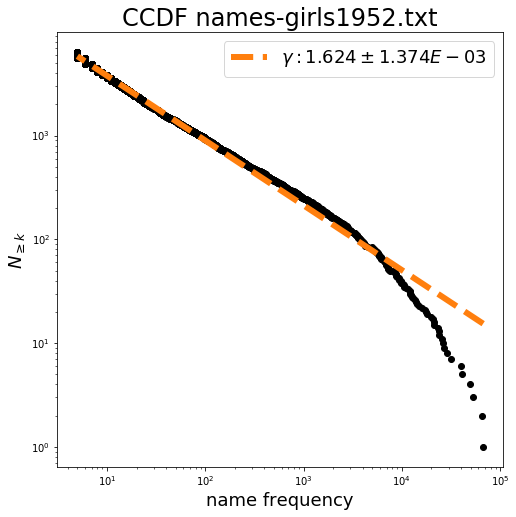

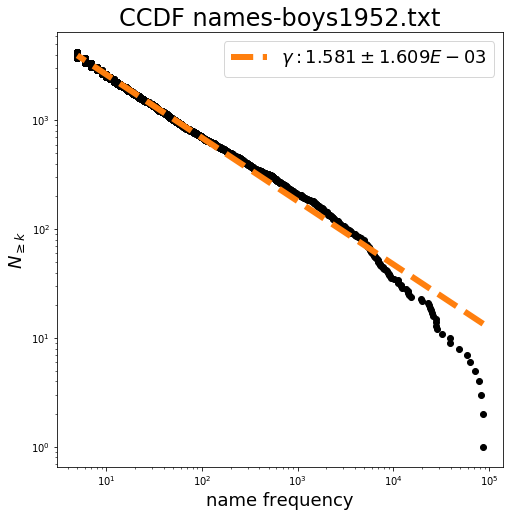

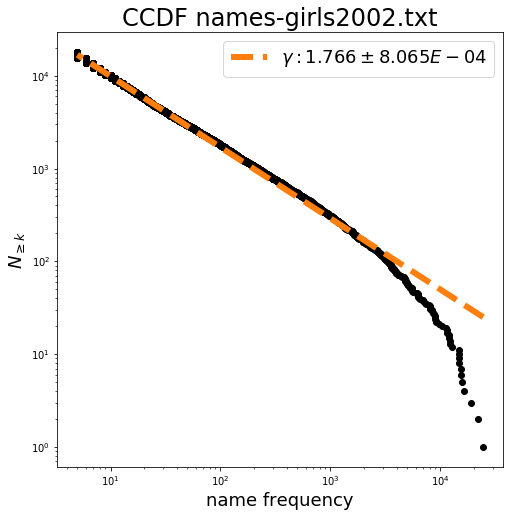

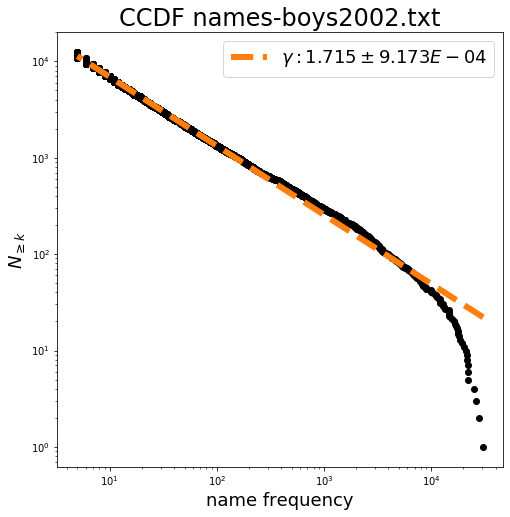

In [4]:
#CCDF
scaling_ranges = [(0, 1e100)]*4

for n, fname in enumerate(fnames):
    df = pd.read_csv("data/"+fname, header=None)
    values = df.values.T
    plot_CCDF(values[2], title="CCDF " + fname, xlabel="name frequency", ylabel="$N_{\geq k}$", scaling_range=scaling_ranges[n]) 
    plt.savefig("figs/part_1/%s_CCDF.png"%(fname), bbox_inches="tight", pad_inches=0, dpi=500)
    plt.savefig("figs/part_1/%s_CCDF.pdf"%(fname), bbox_inches="tight", pad_inches=0)

In [5]:
def plot_ZIPF(samples, title="", xlabel="", ylabel="", save=None, split_point=None):
    N = len(samples)
    Y = np.array(sorted(samples, reverse=True))
    X = np.arange(1, N+1)
    fig, ax = plt.subplots(1, figsize=(8,8))
    ax.scatter(X, Y, c="k")
    
    if split_point is not None:
        mask = (split_point < X)
        X_sub = X[mask]
        Y_sub = Y[mask]
        
        log10_X_sub = np.log10(X_sub)
        log10_Y_sub = np.log10(Y_sub)
        slope, intercept, r_val, p_val, std_err = stats.linregress(log10_X_sub, log10_Y_sub)
        predict = lambda n: intercept + slope * n 
        predictions = np.power(10, predict(log10_X_sub))
        ax.plot(X_sub, predictions, c="C1", linewidth=6, linestyle="dashed", label=r"$\alpha: %.3f \pm %.3E$"%((-1 * slope), std_err * 1.96))
           
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_title(title, fontsize=24)
    if split_point is not None:
        ax.legend(fontsize=18)
    return fig, ax

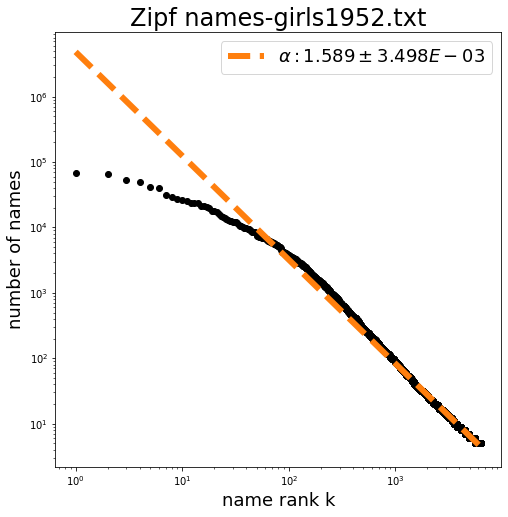

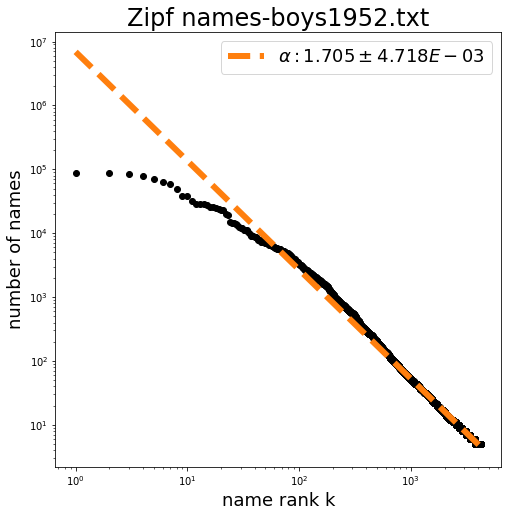

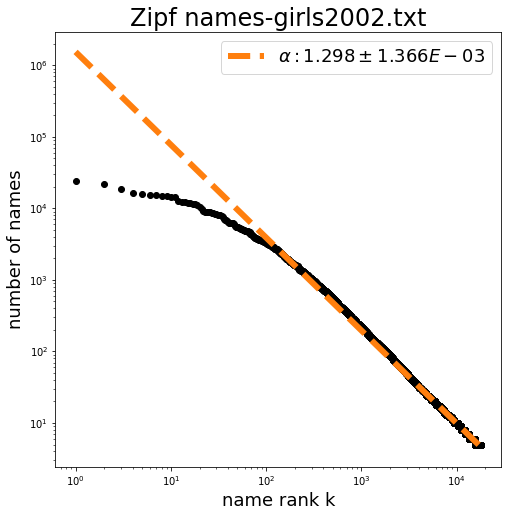

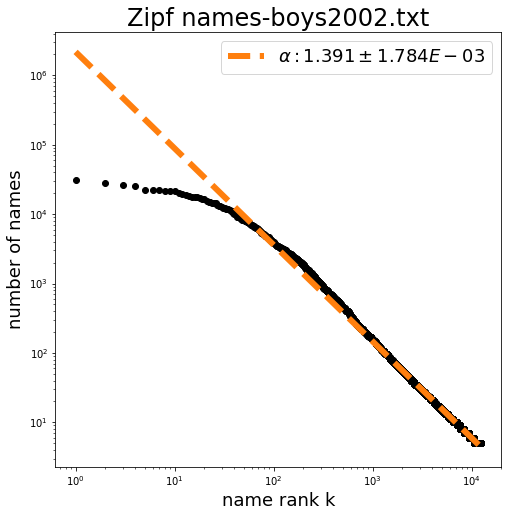

In [6]:
#ZIPF
split_point = [0] * 4  #[2e1, 2e1, 2e1, 2e1]
for n, fname in enumerate(fnames):
    df = pd.read_csv("data/"+fname, header=None)
    values = df.values.T
    plot_ZIPF(values[2], title="Zipf " + fname, xlabel="name rank k", ylabel="number of names", split_point=split_point[n]) 
    plt.savefig("figs/part_1/%s_Zipf.png"%(fname), bbox_inches="tight", pad_inches=0, dpi=500)
    plt.savefig("figs/part_1/%s_Zipf.pdf"%(fname), bbox_inches="tight", pad_inches=0)